[dynamicstorm](https://github.com/fiftystorm36/dynamicstorm) を利用した piv 計測データの解析サンプル

本プログラム実行時のディレクトリ構成: 
- Project Dir
    - example01.ipynb
    - expt_instant_data_sample（複数の DynamicStudio から出力した瞬時データが入ったディレクトリ）

In [1]:
# モジュールインポート
import dynamicstorm as ds
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np

In [2]:
# 表示するデータと DynamicStudio 出力データのラベルの対応を表示（datalabel.py）
# csv ファイルのラベルテキストが異なる場合，正常に動作しない
print('value:', 'label')
print('---------------')
for valiable in ds.label_dict:
    print('{}:'.format(valiable),ds.label_dict[valiable]['label'])

value: label
---------------
x: x (mm)[mm]
y: y (mm)[mm]
N: N
U: U[m/s]
V: V[m/s]
u: Std dev (U)[m/s]
v: Std dev (V)[m/s]
uv: Covar (U
uuu: uuu
vvv: vvv
uuv: uuv
uvv: uvv


In [3]:
# 瞬時データの集まりのオブジェクトを作成
# 瞬時データの csv ファイルが複数入ったディレクトリを指定
expt = ds.model.ExptSet('expt_instant_data_sample')

In [4]:
# クロップ範囲を設定（マスキングがかかっていない範囲[mm]）
# [x_min, x_max, y_min, y_max], クロップしない値は '' で埋める
crop_range = [14.50, 68.29, 2.08, 51.85]

In [5]:
# ベクトル場のグリッド数を設定
grid_shape = [74, 101]

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 36.87it/s]


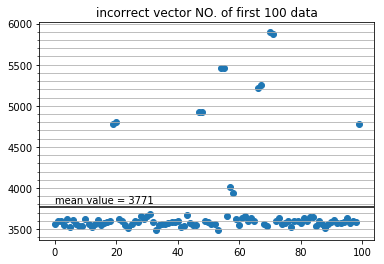

In [6]:
# 誤ベクトル数の例を表示（フィルタリング前）
expt.incorrect_vector_example(100)

In [7]:
# 指定した数以上の誤ベクトルを持つデータを除外
#（multiprocessing を利用しているので，進捗状況は外部ターミナルで表示）
expt.incorrect_vector_filter(3800)

Filtering...
Finish!
Filtered data: 14/106


100%|██████████████████████████████████████████████████████████████████████████████████| 92/92 [00:02<00:00, 37.36it/s]


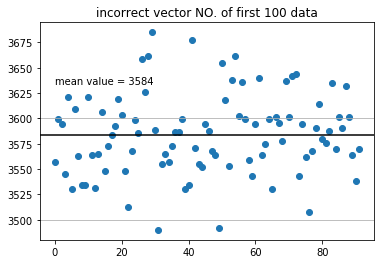

In [8]:
# 誤ベクトル数の例を表示（フィルタリング後）
expt.incorrect_vector_example(100)

In [9]:
# 時間平均（multiprocessing を利用しているので，進捗状況は外部ターミナルで表示）

# 瞬時データのリストから時間平均して時間平均データオブジェクトを生成
stat = ds.model.Statistics(instant_data_list = expt.instant_data_list)

# 時間平均データの csv ファイルを読み出して時間平均データオブジェクトを生成
# （vector statistics 済みの DynamicStudio 出力ファイルでも可）
# stat = ds.model.Statistics(source_file = 'statistics.csv')

Time averaging...
Finish!
Time averaging completed.


In [10]:
# 時間平均されたデータを csv 形式で保存
# stat.save('time_averaged_data.csv')

In [11]:
# 時間平均データフレーム
stat.time_averaged_data_frame

,x (mm)[mm],y (mm)[mm],U[m/s],V[m/s],Std dev (U)[m/s],Std dev (V)[m/s],uuu,vvv,uuv,uvv,Covar (U,N
0,0.700090,0.700090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.422764,0.700090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2.145438,0.700090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2.868112,0.700090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3.590786,0.700090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,4.313460,0.700090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,5.036134,0.700090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,5.758808,0.700090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,6.481481,0.700090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,7.204155,0.700090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
# 空間平均

# 時間平均データのデータフレームから空間平均データを生成
space = ds.model.SpaceAverage(data_frame=stat.time_averaged_data_frame,grid_shape=grid_shape, crop_range=crop_range)
# 保存済みの csv から空間平均データを生成
#space = ds.model.SpaceAverage(source_file='space_averaged_data.csv',grid_shape=[74,101], crop_range=crop_range)

In [13]:
# 空間平均されたデータを csv 形式で保存
#space.save('space_averaged_data.csv')

In [14]:
# 空間平均データフレーム
space.space_averaged_data_frame

,y,U,V,u,v,uv,uuu,vvv,uuv,uvv,N
0,0.000000,-0.039407,0.000939,0.009556,0.003238,1.430805e-04,-2.480846e-03,0.000015,2.194040e-04,-4.749555e-05,5206
1,0.722674,-0.065231,0.001849,0.015740,0.005293,7.537976e-05,-6.330520e-04,0.000023,2.241348e-05,-1.512420e-05,5428
2,1.445348,-0.128242,0.004078,0.013209,0.009272,1.577442e-04,-1.551578e-03,0.000112,9.820172e-05,-5.947813e-05,4905
3,2.168022,-0.127640,0.006621,0.017287,0.009193,4.098912e-04,-1.439313e-03,0.000137,1.379486e-04,-1.331450e-04,4251
4,2.890696,-0.099787,0.005652,0.013973,0.008906,3.164201e-04,-1.016742e-03,0.000105,1.238483e-04,-9.073108e-05,4103
5,3.613369,-0.066615,-0.003747,0.014688,0.009320,-8.879155e-05,-5.129348e-04,-0.000027,1.988427e-05,-4.220604e-05,3775
6,4.336043,-0.039451,0.000077,0.013113,0.008492,1.341000e-04,-2.529329e-04,0.000134,5.454579e-05,-7.672272e-05,3347
7,5.058717,-0.022228,0.005244,0.011495,0.010152,1.588552e-04,-6.446592e-05,0.000126,1.420796e-05,-2.340364e-05,3139
8,5.781391,-0.007417,0.010179,0.009501,0.010425,1.661550e-04,-1.467411e-05,0.000048,7.947717e-06,-1.496869e-05,3124
9,6.504065,0.004290,0.010133,0.011158,0.010154,1.801835e-07,-4.579325e-06,0.000022,3.934810e-06,-4.352699e-06,3492


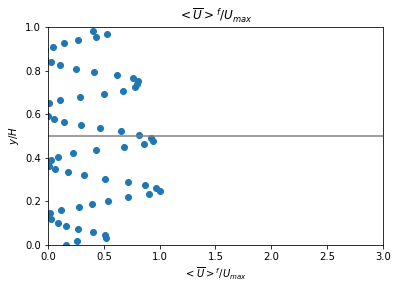

In [15]:
# y軸，data軸の値を設定
y = space.space_averaged_data_frame['y']
data = -space.space_averaged_data_frame['U'] # 主流方向が ← なので符号を反転
U_max = np.max(-space.space_averaged_data_frame['U'])

# 無次元化
y = y / 50
data = data / U_max

# 散布図をプロット
plt.title('$<\overline{U}>^f/U_{max}$')
plt.scatter(data,y)
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel('$<\overline{U}>^f/U_{max}$')
plt.ylabel('$y/H$')
plt.axhline(0.5, color='gray') # y = 0.5 に補助線
plt.show()

In [16]:
# クロップ範囲を取得
x_min_index, x_max_index, y_min_index, y_max_index = ds.get_crop_index(stat.time_averaged_data_frame, grid_shape=grid_shape, crop_range=crop_range)

# 原点を合わせる
xlabel = ds.label_dict['x']['label']
ylabel = ds.label_dict['y']['label']
x = stat.time_averaged_data_frame[xlabel] - stat.time_averaged_data_frame[xlabel][x_min_index]
y = stat.time_averaged_data_frame[ylabel] - stat.time_averaged_data_frame[ylabel][y_min_index]

x = x.values.reshape(grid_shape)[0,:]
y = y.values.reshape(grid_shape)[:,0]

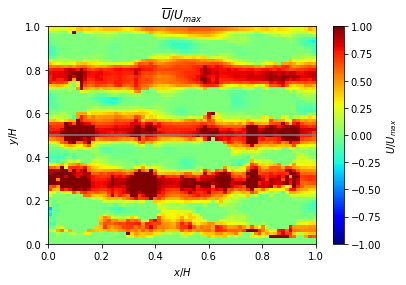

In [17]:
# コンタープロット用に x 軸，y 軸のグリッドを作成
X, Y = np.meshgrid(x,y)

# 主流方向が ← なので，左右反転，主流方向速度の符号を反転させる
label = ds.label_dict['U']['label']
C = np.fliplr(-stat.time_averaged_data_frame[label].values.reshape(grid_shape))
X = np.fliplr(X)

# 無次元化
C = C / U_max
X = X / 50
Y = Y / 50

# コンター図をプロット
plt.title('$\overline{U}/U_{max}$')
plt.pcolor(X, Y, C, cmap='jet')
bar = plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.clim([-1,1])
plt.axhline(0.5, color='gray') # y = 0.5 に補助線
plt.xlabel('$x/H$')
plt.ylabel('$y/H$')
bar.set_label('$U/U_{max}$')
plt.show()